In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
import warnings
warnings.filterwarnings('ignore')

**t-SNE** с помощья него можно снижать размерность данных, что позволяет визуализировать многомерные массивы в 2D или 3D графике. Если объекты имеют большое колличество признаков,  то можно получить представление о них, преобразовав данные с помощью алгоритма t-SNE.
В частности можно увидеть возможность разделения обьектов на кластеры, определить подходящее их число, а также получить представление о качестве разбиения на кластеры.

In [3]:
from sklearn.manifold import TSNE

Загрузим данные о недвижимости

In [4]:
from sklearn.datasets import load_boston

In [5]:
boston = load_boston()

In [6]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [7]:
data=boston.data
feature_names = boston.feature_names
target = boston.target

In [8]:
for i in boston.DESCR.split('\n'):
    print(i)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [9]:
X = pd.DataFrame(data,columns=feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [11]:
y = pd.DataFrame(target,columns=['price'])
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=7)

In [13]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((354, 13), (152, 13), (354, 1), (152, 1))

#### Маштабирование данных

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()

In [16]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [18]:
X_train_scaled.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,3.540000e+02,3.540000e+02,3.540000e+02,3.540000e+02,3.540000e+02,3.540000e+02,3.540000e+02,3.540000e+02,3.540000e+02,3.540000e+02,3.540000e+02,3.540000e+02,3.540000e+02
mean,6.539025e-17,-1.229400e-16,3.834347e-15,2.236127e-16,-6.328898e-15,-1.645890e-15,-1.647772e-15,1.259194e-16,-6.915372e-17,-2.540341e-17,2.696337e-14,5.918524e-15,4.967778e-16
std,1.001415e+00,1.001415e+00,1.001415e+00,1.001415e+00,1.001415e+00,1.001415e+00,1.001415e+00,1.001415e+00,1.001415e+00,1.001415e+00,1.001415e+00,1.001415e+00,1.001415e+00
min,-4.573040e-01,-4.759137e-01,-1.544085e+00,-2.873479e-01,-1.487665e+00,-3.704401e+00,-2.258482e+00,-1.253636e+00,-9.564521e-01,-1.294668e+00,-2.672586e+00,-4.107450e+00,-1.516359e+00
25%,-4.469730e-01,-4.759137e-01,-8.629623e-01,-2.873479e-01,-8.858051e-01,-5.298534e-01,-8.606812e-01,-8.016284e-01,-6.078756e-01,-7.577230e-01,-4.675566e-01,1.938065e-01,-7.849473e-01
50%,-4.245270e-01,-4.759137e-01,-2.149596e-01,-2.873479e-01,-1.600333e-01,-1.298213e-01,3.057967e-01,-2.759254e-01,-4.916834e-01,-4.415219e-01,2.674533e-01,3.693604e-01,-1.606376e-01
75%,-6.784350e-02,7.522950e-02,9.960856e-01,-2.873479e-01,6.276946e-01,4.549729e-01,9.217615e-01,6.547896e-01,-1.431068e-01,1.563073e+00,8.187108e-01,4.258572e-01,5.877205e-01
max,8.981036e+00,3.712775e+00,2.384252e+00,3.480102e+00,2.813861e+00,3.376201e+00,1.105565e+00,4.037943e+00,1.715968e+00,1.831546e+00,1.278092e+00,4.258572e-01,3.396775e+00


#### Применение t-SNE

In [19]:
# n_components=2 - получить кля каждого объекта две компоненты(координаты),
#по которым мы сможем построитдвумерный график

# learning_rate=150 - как плотно будут распологаться точки реомендуется задавать в диапозоне от 10 до 1000
tsne = TSNE(n_components=2,learning_rate=150,random_state=100)

In [20]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

In [21]:
X_train_tsne

array([[ 29.405048  ,  -7.5522704 ],
       [  5.8658705 , -10.883258  ],
       [ 26.05793   , -20.519955  ],
       [ 24.698063  , -21.08252   ],
       [ 25.352638  , -11.3375025 ],
       [  8.26603   ,   8.857971  ],
       [  5.950132  ,   9.273748  ],
       [-13.158973  ,   3.1918762 ],
       [-17.553284  ,  10.465562  ],
       [ 32.76806   , -15.548753  ],
       [-13.811531  ,   7.3871803 ],
       [ 27.922699  ,  -6.894809  ],
       [ -5.536215  ,  -0.5374289 ],
       [-15.75593   ,  12.562386  ],
       [ 26.931305  , -21.276148  ],
       [-19.451988  ,  14.168899  ],
       [ -8.133663  ,   6.271011  ],
       [ 27.624561  , -21.367247  ],
       [-17.967472  ,   9.214143  ],
       [ 28.754122  , -10.930978  ],
       [  4.43713   ,  -8.805929  ],
       [ -2.7869797 ,   6.994     ],
       [-14.9308195 ,  10.408099  ],
       [-18.880047  ,  15.237269  ],
       [ 25.036835  , -21.516737  ],
       [ -1.9183384 ,   5.4480968 ],
       [ 24.274048  , -12.040439  ],
 

In [22]:
X_train_tsne.shape

(354, 2)

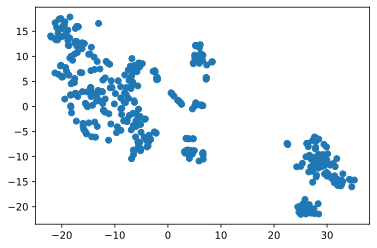

In [23]:
plt.scatter(X_train_tsne[:,0],X_train_tsne[:,1])

Видно, что можно разбить данные на две группы

In [24]:
from sklearn.cluster import KMeans

In [25]:
kmeans = KMeans(n_clusters=2)

In [26]:
labels_train = kmeans.fit_predict(X_train_scaled)

In [27]:
pd.value_counts(labels_train)

1    232
0    122
dtype: int64

In [28]:
labels_test = kmeans.predict(X_test_scaled)

График t-SNE с известными лейблами

Text(25, 0, 'Кластер 1')

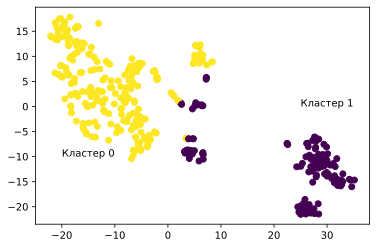

In [29]:
plt.scatter(X_train_tsne[:,0],X_train_tsne[:,1],c=labels_train)
plt.text(-20,-10,'Кластер 0')
plt.text(25,0,'Кластер 1')

#### Посмотрим на данные расположенние в разных кластерах

In [30]:
y_train.mean()

price    22.595763
dtype: float64

In [31]:
y_train[labels_train==0].mean()

price    16.227869
dtype: float64

In [32]:
y_train[labels_train==1].mean()

price    25.944397
dtype: float64

Text(0.5, 0, 'Цена')

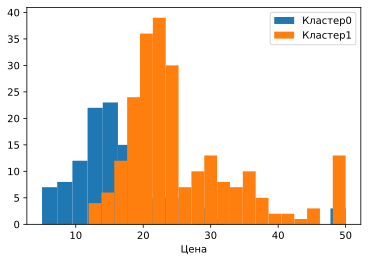

In [33]:
plt.hist(y_train[labels_train==0], bins=20)
plt.hist(y_train[labels_train==1], bins=20)
plt.legend(['Кластер0','Кластер1'])
plt.xlabel('Цена')

In [34]:
X_train.loc[labels_train==0,'CRIM'].mean()

9.05679418032787

In [35]:
X_train.loc[labels_train==1,'CRIM'].mean()

0.26798159482758627

Text(0.5, 0, 'Сrim')

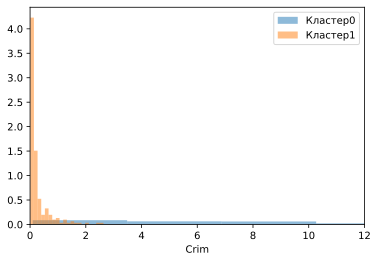

In [36]:
plt.hist(X_train.loc[labels_train==0,'CRIM'], bins=20, density=True,alpha=0.5)
plt.hist(X_train.loc[labels_train==1,'CRIM'], bins=20, density=True,alpha=0.5)
plt.xlim(0,12)
plt.legend(['Кластер0','Кластер1'])
plt.xlabel('Сrim')

Text(0.5, 0, 'NOX')

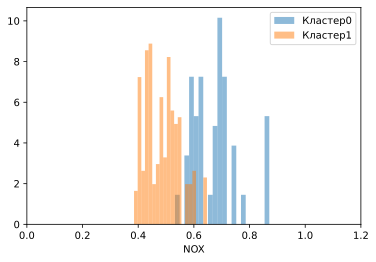

In [37]:
plt.hist(X_train.loc[labels_train==0,'NOX'], bins=20, density=True,alpha=0.5)
plt.hist(X_train.loc[labels_train==1,'NOX'], bins=20, density=True,alpha=0.5)
plt.xlim(0,1.2)
plt.legend(['Кластер0','Кластер1'])
plt.xlabel('NOX')

#### Использование информации, полученной с помощью t-SNE в модделях

Базовая модель предсказания цены на недвижимость (до разделения на кластеры)

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
lr = LinearRegression()

In [40]:
lr.fit(X_train_scaled,y_train)

LinearRegression()

In [41]:
y_test_pred =lr.predict(X_test_scaled)

In [42]:
from sklearn.metrics import r2_score

In [43]:
r2_score(y_test,y_test_pred)

0.6508417720329545

Две модели построенные на обьектах разных кластеров

In [44]:
# 1-ая модель построенная из кластере 0
lr.fit(X_train_scaled.loc[labels_train==0,:],
       y_train[labels_train==0])

y_test_pred_0=lr.predict(X_test_scaled.loc[labels_test==0,:])

r2_score(y_test[labels_test==0],y_test_pred_0)

0.6458127429551197

In [45]:
# 2-ая модель построенная из кластере 0
lr.fit(X_train_scaled.loc[labels_train==1,:],
       y_train[labels_train==1])

y_test_pred_1=lr.predict(X_test_scaled.loc[labels_test==1,:])

r2_score(y_test.loc[labels_test==1],y_test_pred_1)

0.8316034335298439

In [47]:
# Обьединение известных правильных ответов по обьектам из двух кластеров
y_test_all = np.vstack([y_test[labels_test==0],
                       y_test[labels_test==1]])

In [49]:
y_test_pred_all = np.vstack([y_test_pred_0,
                       y_test_pred_1])

In [50]:
r2_score(y_test_all,y_test_pred_all)

0.8055877528812476